# Decision Trees

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


As expected, the accuracy on the training set is 100%—because the leaves are pure, the tree was grown deep enough that it could perfectly memorize all the labels on the training data. The test set accuracy is slightly worse than for the linear models we looked at previously, which had around 95% accuracy.

If we don't restrict the depth of a decision tree, the tree can become arbitrarily deep and complex. Unpruned trees are therefore prone to overfitting and not generalizing well to new data. Now let's apply pre-pruning to the tree, which will stop developing the tree before we perfectly fit to the training data. One option is to stop building the tree after a certain depth has been reached. Here we set max_depth=4, meaning only four consecutive questions can be asked (cf. Figures 2-24 and 2-26). Limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set:

In [4]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


## Random forests

A main drawback of decision trees is that they tend to overfit the training data. Random forests are one way to address this problem. A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data. If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. This reduction in overfitting, while retaining the predictive power of the trees, can be shown using rigorous mathematics.

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

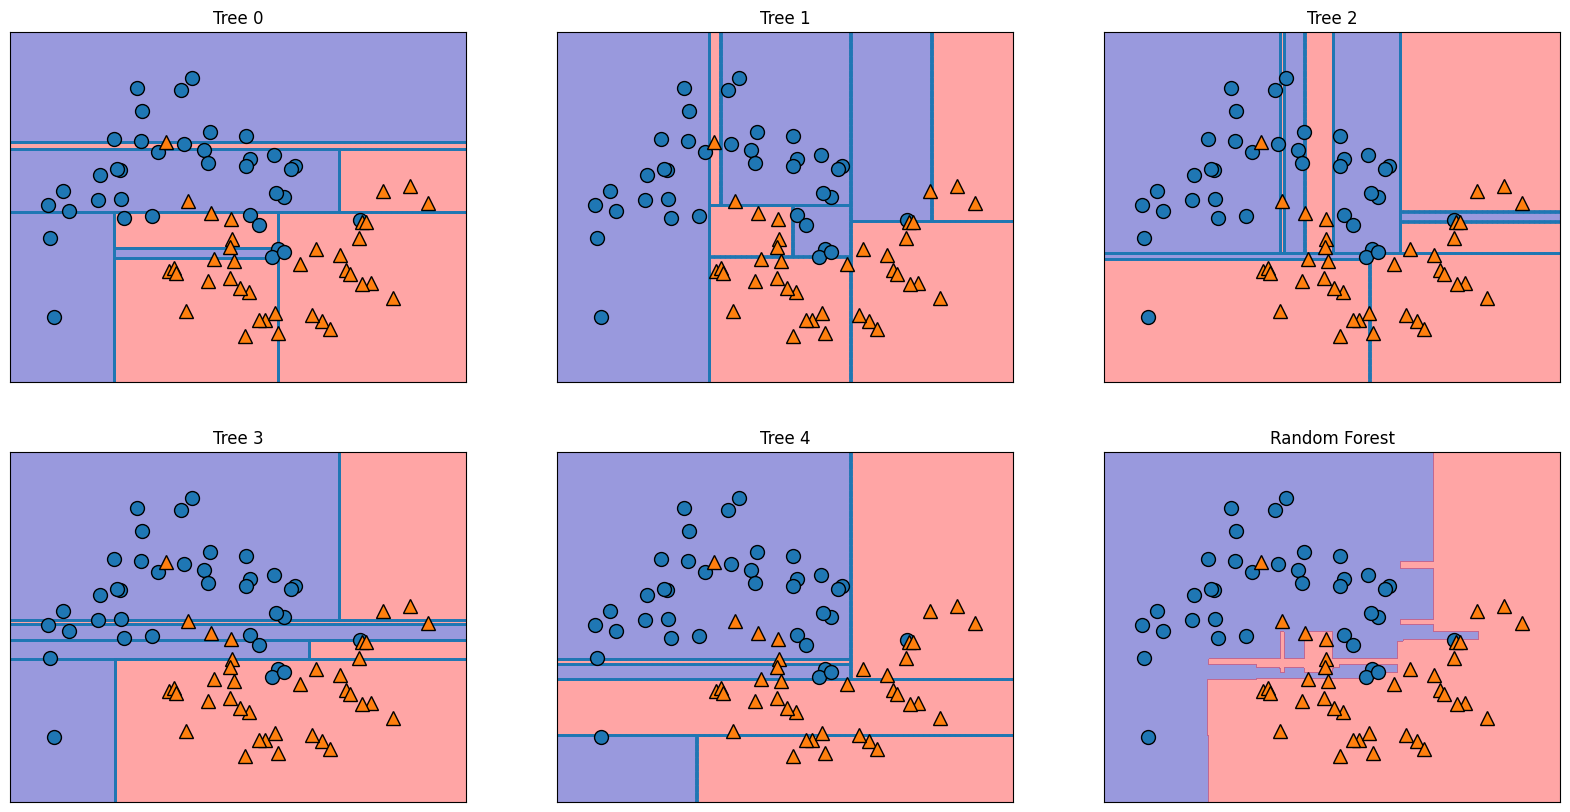

In [8]:
import mglearn
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
        ax.set_title("Tree {}".format(i))
        mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                    alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

Above: Decision boundaries found by five randomized decision trees and the decision boundary obtained by averaging their predicted probabilities

As another example, let's apply a random forest consisting of 100 trees on the Breast Cancer dataset:

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
        cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


The random forest gives us an accuracy of 97%, better than the linear models or a single decision tree, without tuning any parameters. We could adjust the max_fea tures setting, or apply pre-pruning as we did for the single decision tree. However, often the default parameters of the random forest already work quite well.

## Gradient boosted regression trees (gradient boosting machines)

The gradient boosted regression tree is another ensemble method that combines mul‐ tiple decision trees to create a more powerful model. Despite the "regression" in the name, these models can be used for regression and classification. In contrast to the random forest approach, gradient boosting works by building trees in a serial man‐ ner, where each tree tries to correct the mistakes of the previous one. By default, there is no randomization in gradient boosted regression trees; instead, strong pre-pruning is used. Gradient boosted trees often use very shallow trees, of depth one to five, which makes the model smaller in terms of memory and makes predictions faster.

The main idea behind gradient boosting is to combine many simple models (in this context known as weak learners), like shallow trees. Each tree can only provide good predictions on part of the data, and so more and more trees are added to iteratively improve performance.

Gradient boosted trees are frequently the winning entries in machine learning competitions, and are widely used in industry. They are generally a bit more sensitive to parameter settings than random forests, but can provide better accuracy if the parameters are set correctly.

Here is an example of using GradientBoostingClassifier on the Breast Cancer dataset. By default, 100 trees of maximum depth 3 and a learning rate of 0.1 are used:

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(
        cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


As the training set accuracy is 100%, we are likely to be overfitting. To reduce overfitting, we could either apply stronger pre-pruning by limiting the maximum depth or lower the learning rate:

In [11]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))


Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [12]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.958


Both methods of decreasing the model complexity reduced the training set accuracy, as expected. In this case, lowering the maximum depth of the trees provided a signifi‐ cant improvement of the model, while lowering the learning rate only increased the generalization performance slightly.